In [1]:
import os
import json
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import numpy as np
from pprint import pprint

In [2]:
VIDEO_IDS = [x.name for x in os.scandir("../videos")]
print(VIDEO_IDS)

['L7NePx9HLG8', 'rcrgL_RuBKk', 'Z61YcGTJnkY', '3I1Qap3TbSA', '8UsOZZOB4S8', '5cm25thVkWg', 'wVgeynndwGs', 'xcrvQc8r_b4', 'TamEeDdWlmo', '3fiyPrwliv0', 'IhQC8aOaSuA', 'tqFnBcKUdhA']


In [14]:
def get_video_sample(video_id):
    # rejection sample frame number with first, last, middle, and CLIP frames
    highest_frame_number = max(
        [int(x.split("-")[0]) for x in os.listdir(f"../videos/{video_id}/frames")]
    )

    while True:
        frame_number = np.random.randint(0, highest_frame_number)
        if not all(os.path.exists(f"../videos/{video_id}/frames/{frame_number}-{frame_path}.png") for frame_path in ["first", "last", "middle", "clip"]):
            continue
        break

    # display frames in a 4x1 grid
    fig, axs = plt.subplots(1, 4, figsize=(15, 15))

    video_text = ""
    with open(f"../videos/{video_id}/transcript.txt") as f:
        segments = []
        
        for i, line in enumerate(f):
            if i == frame_number:
                video_text = line.split("\\")[-1]
                break

    fig.suptitle(f"{video_id} - {video_text}")

    for i, frame_path in enumerate(["first", "last", "middle", "clip"]):
        img = mpimg.imread(f"../videos/{video_id}/frames/{frame_number}-{frame_path}.png")
        axs[i].imshow(img)
        axs[i].set_title(frame_path)
    

    plt.show()                            


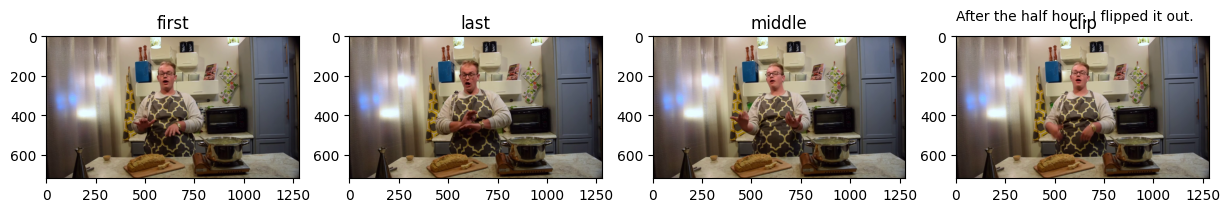

In [15]:
# for video_id in VIDEO_IDS:
#     # for i in range(5):
#     get_video_sample(video_id)
get_video_sample(VIDEO_IDS[0])